# HACKATHON: SOUTH AFRICAN LANGUAGE IDENTIFICATION

In [1]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="uHuD3EHSgpfvOeFS27hD86O6O",
    project_name="gathoni-south-african-language-identification-hackathon",
    workspace="gathoninjogu",
) 

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\User\\Desktop\\Xplore Desktop\\Advanced Classification\\MCQs\\Hackathon' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/gathoninjogu/gathoni-south-african-language-identification-hackathon/471621475fee4865aefd7550362d48e1



# SOUTH AFRICAN LANGUAGE IDENTIFICATION 2011
![Hackathon_South_Africa_languages_2011.jpeg](attachment:Hackathon_South_Africa_languages_2011.jpeg)

### About the problem
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government. With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

### The Objective
Create a Machine Learning model that is able to identify the language that a text is in, which is in any of South Africa's 11 Official languages.
Providing an accurate and robust solution to this task gives the government and other stake holders access to a broad base of which languages are broadly used, spanning multiple demographic and geographic categories - thus increasing their insights and informing future development strategies.



In [2]:
#pip install tensorflow

In [3]:
#pip install xgboost

## 1. Importing Packages


In [4]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem import PorterStemmer

# Libraries for model building
#import tensorflow
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

# Libraries for data preprocessing and model performance
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer, ENGLISH_STOP_WORDS
from sklearn.metrics import confusion_matrix, f1_score,classification_report, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



## 2. Loading the Data


In [59]:
# Let us import our test and train data

train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')
samplesubmission = pd.read_csv('sample_submission.csv')


print(train.shape)
print(test.shape)
print(samplesubmission.shape)


(33000, 2)
(5682, 2)
(2, 2)


In [6]:
train.head(5)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [7]:
test.head(5)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


## 3. Exploratory Data Analysis (EDA)

In [8]:
# Check for null values

train.isnull().any()
test.isnull().any()

index    False
text     False
dtype: bool

In [9]:
# Print the languages found in the dataset
lang_ids = list(train.lang_id.unique())
print(lang_ids)

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


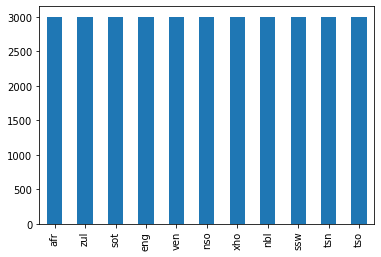

In [10]:
train['lang_id'].value_counts().plot(kind = 'bar')
plt.show()

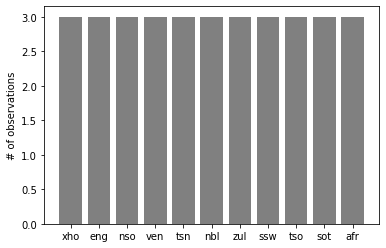

In [11]:
#Lets take a look at the breakdown of Language Ids (target variable)

labels = lang_ids
heights = [len(label) for label in labels]
plt.bar(labels,heights,color='grey')
plt.xticks(labels)
plt.ylabel("# of observations")
plt.show()

######  --Observations--

We can see from the graph above that our classes are balanced and multiclass.

In [12]:
# Get actual count and statistics of the target variable
train.groupby('lang_id').describe().T

lang_id                                                    afr  \
text count                                                3000   
     unique                                               2641   
     top     die beskerming van suid-afrika se omgewing en ...   
     freq                                                    5   

lang_id                                                    eng  \
text count                                                3000   
     unique                                               2998   
     top     provincial revenue includes budgeted equitable...   
     freq                                                    2   

lang_id                                                    nbl  \
text count                                                3000   
     unique                                               2362   
     top     ngokwesekhtjheni yomthetho ophathelene nalokhu...   
     freq                                                   17   

lang_id                                                    nso  \
text count                                                3000   
     unique                                               2873   
     top     bolwetši bo phatlalala ka phetelo ya lerothiny...   
     freq                                                    4   

lang_id                                                    sot  \
text count                                                3000   
     unique                                               2833   
     top     tip-offs anonymous ke tshebeletso ya mohala wa...   
     freq                                                    6   

lang_id                                                    ssw  \
text count                                                3000   
     unique                                               2426   
     top     lesifo sisabalala ngematfonsi ematse k k uma n...   
     freq                                                    5   

lang_id                                                    tsn  \
text count                                                3000   
     unique                                               2869   
     top     diforomo tsa kopo di ka tsewa gongwe go isiwa ...   
     freq                                                    9   

lang_id                                                    tso  \
text count                                                3000   
     unique                                               2758   
     top     ku ya hi xiyenge xa xa nawu u ni mfanelo yo ko...   
     freq                                                   10   

lang_id                                                    ven  \
text count                                                3000   
     unique                                               2605   
     top     vhabebi vhanu vha tea u ṋekana nga vhuṱanzi ha...   
     freq                                                    8   

lang_id                                                    xho  \
text count                                                3000   
     unique                                               2659   
     top     ukuthintelwa kweempawu ezibonisa ukungalungi k...   
     freq                                                    6   

lang_id                                                    zul  
text count                                                3000  
     unique                                               2924  
     top     i-tip-offs anonymous wusizo locingo oluzimele ...  
     freq                                                    5

In [13]:
# In order to see all available stopword languages, you can retrieve the list of fileids using: 
print(stopwords.fileids())

['arabic', 'azerbaijani', 'bengali', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [14]:
##### The official languages of the Republic of South Africa are: 
##### Sepedi(Nso), Sesotho(Sot), Setswana(Tsn), siSwati(Ssw), Tshivenda(Ven), Xitsonga(Tso), Afrikaans(Afr), English(Eng), isiNdebele(Nbl), isiXhosa(Xho) and isiZulu(Zul)

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

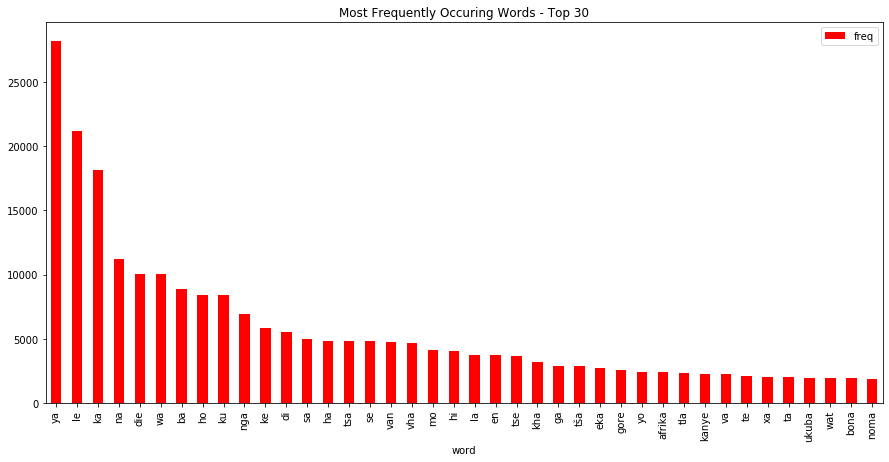

In [15]:
# Lets take a look at the most occuring words in our train dataset


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(40).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'red')
plt.title("Most Frequently Occuring Words - Top 30")

### Let take a deeper view by building wordclouds for all the 11 official languages in our dataset, so that we can have markers for each language


Text(0.5, 1.0, 'WordCloud - Vocabulary from All the Languages')

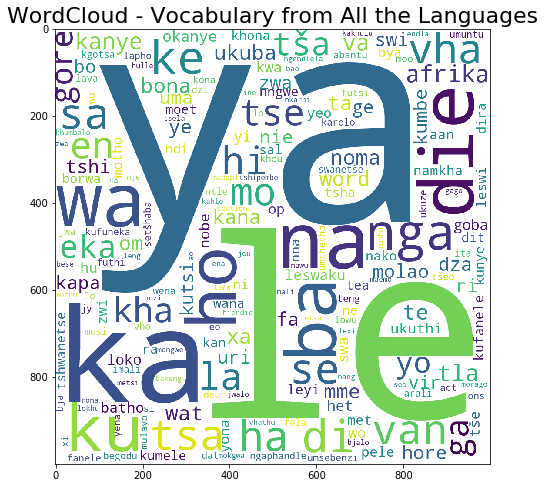

In [16]:
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from All the Languages", fontsize = 22)

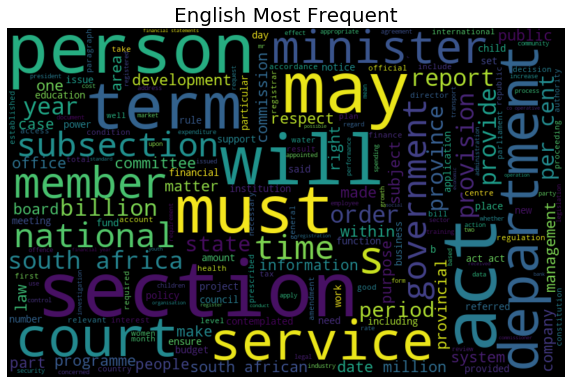

In [17]:
Eng_words =' '.join([text for text in train['text'][train['lang_id'] == 'eng']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(Eng_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('English Most Frequent', fontsize = 20)
plt.show()

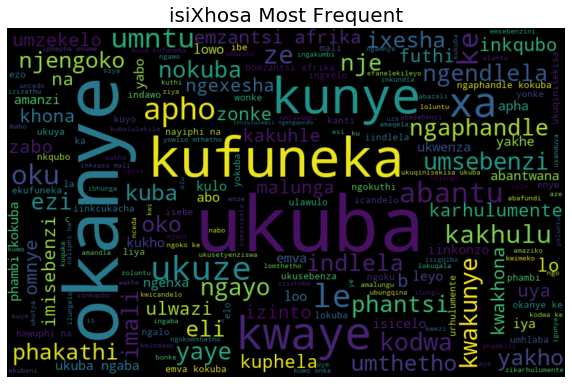

In [18]:
Xho_words =' '.join([text for text in train['text'][train['lang_id'] == 'xho']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(Xho_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('isiXhosa Most Frequent', fontsize = 20)
plt.show()

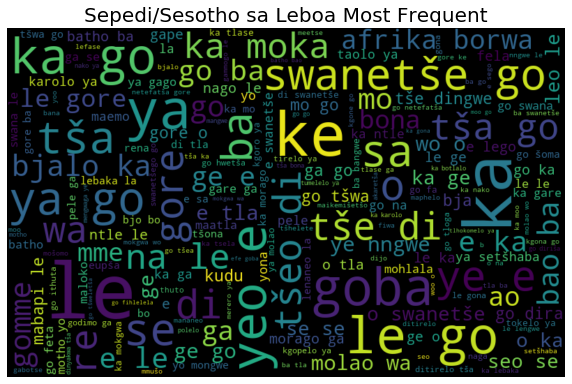

In [19]:
Nso_words =' '.join([text for text in train['text'][train['lang_id'] == 'nso']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(Nso_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Sepedi/Sesotho sa Leboa Most Frequent', fontsize = 20)
plt.show()

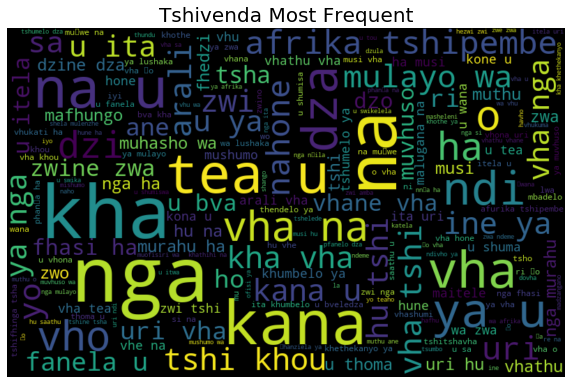

In [20]:
Ven_words =' '.join([text for text in train['text'][train['lang_id'] == 'ven']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(Ven_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Tshivenda Most Frequent', fontsize = 20)
plt.show()

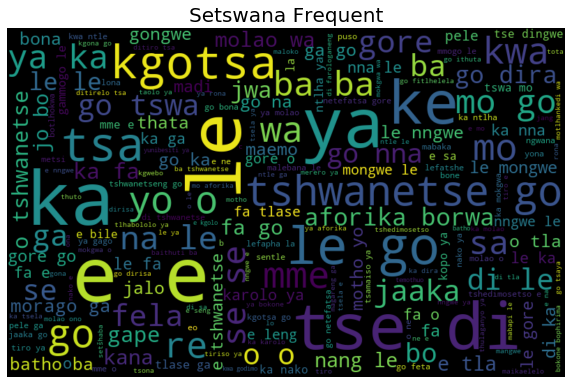

In [21]:
Tsn_words =' '.join([text for text in train['text'][train['lang_id'] == 'tsn']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(Tsn_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Setswana Frequent', fontsize = 20)
plt.show()

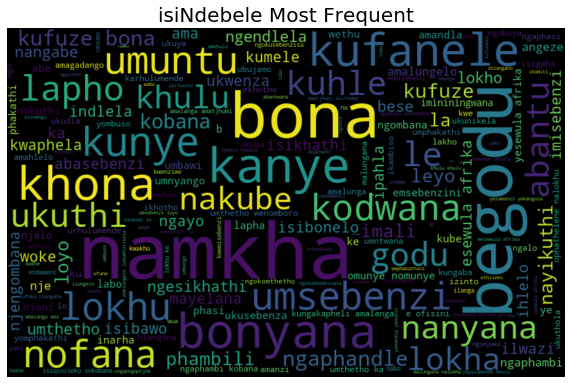

In [22]:
Nbl_words =' '.join([text for text in train['text'][train['lang_id'] == 'nbl']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(Nbl_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('isiNdebele Most Frequent', fontsize = 20)
plt.show()

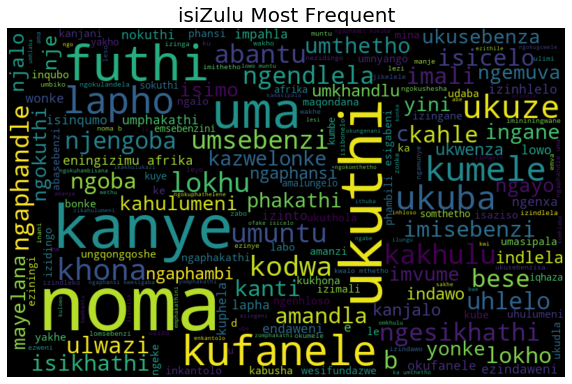

In [23]:
Zul_words =' '.join([text for text in train['text'][train['lang_id'] == 'zul']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(Zul_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('isiZulu Most Frequent', fontsize = 20)
plt.show()

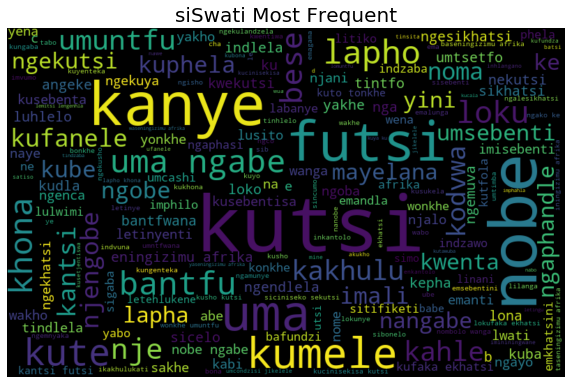

In [24]:
Ssw_words =' '.join([text for text in train['text'][train['lang_id'] == 'ssw']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(Ssw_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('siSwati Most Frequent', fontsize = 20)
plt.show()

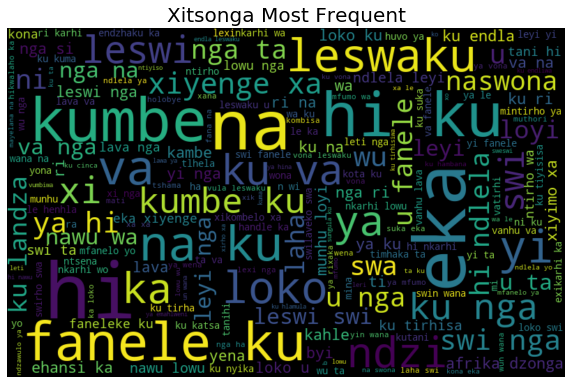

In [25]:
Tso_words =' '.join([text for text in train['text'][train['lang_id'] == 'tso']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(Tso_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Xitsonga Most Frequent', fontsize = 20)
plt.show()

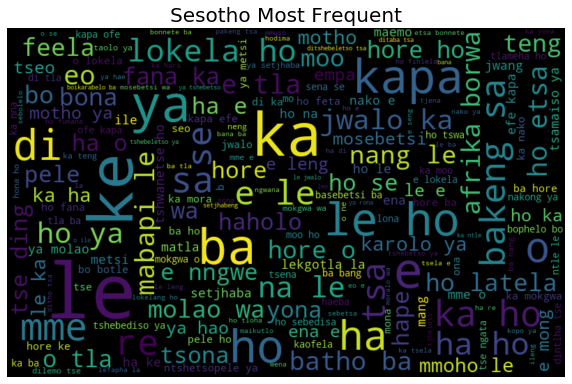

In [26]:
Sot_words =' '.join([text for text in train['text'][train['lang_id'] == 'sot']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(Sot_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Sesotho Most Frequent', fontsize = 20)
plt.show()

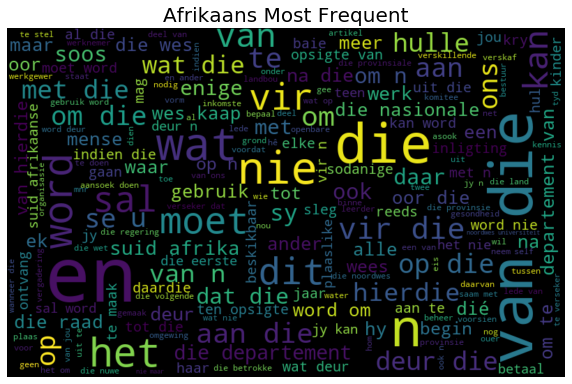

In [27]:
Afr_words =' '.join([text for text in train['text'][train['lang_id'] == 'afr']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(Afr_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Afrikaans Most Frequent', fontsize = 20)
plt.show()

## 4. Text Cleaning

### Removing Noise

### Remove punctuation

First we make all the text lower case to remove some noise from capitalisation.
We do it for both train and test data

In [28]:
train['text'] = train['text'].str.lower()

In [29]:
test['text'] = test['text'].str.lower()

Now let's remove the punctuation and digits using the `string` import from both train and test data

In [30]:
import string
print(string.punctuation + '0123456789')

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789


In [31]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [32]:
test['text'] = test['text'].apply(remove_punctuation)

In [33]:
train['text'] = train['text'].apply(remove_punctuation)

In [34]:
#Remove NonAscii

def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

train['text'] = train['text'].apply(_removeNonAscii)
test ['text']= test['text'].apply(_removeNonAscii)

### Tokenisation

In [35]:
tokeniser = TreebankWordTokenizer()
train['tokens'] = train['text'].apply(tokeniser.tokenize)

## 5. Modelling

In [36]:
#Splitting you Data for X and Y
X = train['text']
y = train['lang_id']

In [37]:
# creating bag of words

vectorizer = CountVectorizer(ngram_range=(1,2), min_df=2)
# fit the model for training data
X = vectorizer.fit_transform(X)

print(X.shape)
print(y.shape)

(33000, 205877)
(33000,)


In [38]:
# creating bag of words for test data
x_test = test['text']
x_t =vectorizer.transform(x_test)


print(x_t.shape)

(5682, 205877)


In [39]:
#Split the X data into train and valid 

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, random_state = 42)

#### Let's build some classification models, First with Bag of Words and then with TfIdf

In [40]:
names = ['Logistic Regression', 'Multinomial NaiveB',          
         'BaggingClassifier']

In [41]:
classifiers = [
    LogisticRegression(C=10), 
    MultinomialNB(),
    BaggingClassifier(base_estimator = LogisticRegression(C=10))
]

In [42]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(x_train, y_train)
    
    print ('... predicting')
    y_pred = clf.predict(x_train)   
    y_pred_test = clf.predict(x_valid)
    
    print ('... scoring')
    accuracy  = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred,average="macro")
    recall    = recall_score(y_train, y_pred,average="macro")
    
    f1        = f1_score(y_train, y_pred,average="macro")    
    f1_test   = f1_score(y_valid, y_pred_test,average="macro")    
    
    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = confusion_matrix(y_train, y_pred)
    class_report[name] = classification_report(y_train, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



... predicting
... scoring
Fitting Multinomial NaiveB model...
... predicting
... scoring
Fitting BaggingClassifier model...


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\User\

... predicting
... scoring
... All done!


In [43]:
### Lets build new models with the Tf-Idf Method

In [44]:
#Splitting you Data for X and Y
X = train['text']
y = train['lang_id']

In [45]:
# creating bag of words

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2)
# fit the model for training data
X = vectorizer.fit_transform(X)

print(X.shape)
print(y.shape)

(33000, 205877)
(33000,)


In [46]:
# creating bag of words for test data
x_test = test['text']
x_t =vectorizer.transform(x_test)


print(x_t.shape)

(5682, 205877)


In [47]:
#Split the X data into train and valid 

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [48]:
names2 = ['Logistic Regression', 'Multinomial NaiveB',          
         'BaggingClassifier']

In [49]:
classifiers2 = [
    LogisticRegression(C=10), 
    MultinomialNB(),
    BaggingClassifier(base_estimator = LogisticRegression(C=10))
]

In [50]:
results_2 = []

models_2 = {}
confusion_2 = {}
class_report_2 = {}

for name, clf in zip(names2, classifiers2):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(x_train, y_train)
    
    print ('... predicting')
    y_pred = clf.predict(x_train)   
    y_pred_test = clf.predict(x_valid)
    
    print ('... scoring')
    accuracy  = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred,average="macro")
    recall    = recall_score(y_train, y_pred,average="macro")
    
    f1        = f1_score(y_train, y_pred,average="macro")    
    f1_test   = f1_score(y_valid, y_pred_test,average="macro")    
    
    # Save the results to dictionaries
    models_2[name] = clf    
    confusion_2[name] = confusion_matrix(y_train, y_pred)
    class_report_2[name] = classification_report(y_train, y_pred)
    
    results_2.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
results_2 = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results_2.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



... predicting
... scoring
Fitting Multinomial NaiveB model...
... predicting
... scoring
Fitting BaggingClassifier model...


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\User\

... predicting
... scoring
... All done!


## 6. Model Performance

#### Lets see how the Normal Bag of Words method model performed

In [51]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Logistic Regression,1.000000,1.000000,1.000000,1.000000,0.995267,21.165277
Multinomial NaiveB,0.999811,0.999810,0.999811,0.999810,0.998935,0.319102
BaggingClassifier,0.999773,0.999773,0.999774,0.999773,0.995108,213.004274


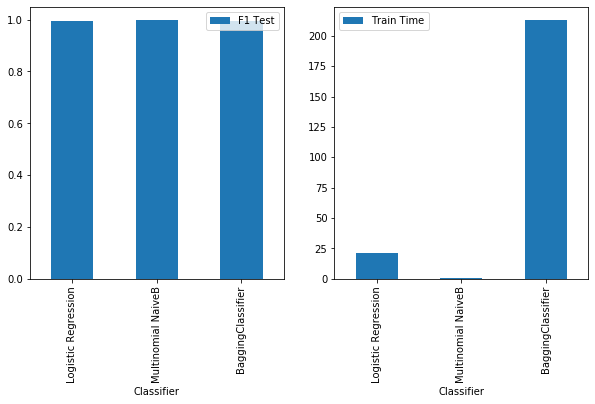

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y='F1 Test', kind='bar', ax=ax[0], xlim=[0,1.1])
results.plot(y='Train Time', kind='bar', ax=ax[1])

### Let us see how our Tf-Idf method model performed

In [58]:
results_2.set_index(names2, inplace= True)

KeyError: "None of ['Logistic Regression', 'Multinomial NaiveB', 'BaggingClassifier'] are in the columns"

In [53]:
results_2.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
NaN,1.000000,1.000000,1.000000,1.000000,0.995267,21.165277
NaN,0.999811,0.999810,0.999811,0.999810,0.998935,0.319102
NaN,0.999773,0.999773,0.999774,0.999773,0.995108,213.004274


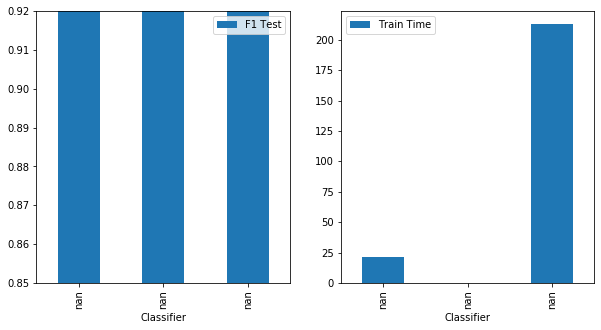

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results_2.sort_values('F1 Train', ascending=False, inplace=True)
results_2.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.85,0.92])
results_2.plot(y='Train Time', kind='bar', ax=ax[1])

### Prepare Kaggle submission data from the models

In [61]:
# Here 'ovr' indicates that we have selected our One-vs-Rest strategy. 
logreg = LogisticRegression(multi_class='ovr', C=10)

In [62]:
bgc = BaggingClassifier(base_estimator = LogisticRegression(C=10))

In [63]:
m_nb = MultinomialNB()

In [64]:
bgc.fit(X,y)
m_nb.fit(X,y)
logreg.fit(X,y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
lg1_pred = logreg.predict(x_t)
m_nb_pred = m_nb.predict(x_t)
bgc_1 = bgc.predict(x_t)

In [72]:
# Create a submission file xgb
test['lang_id'] = lg1_pred
test[['index','lang_id']].to_csv("lg_02.csv", index = False)

sub_file2 = test[['index','lang_id']]

test['lang_id'] = bgc_1
test[['index','lang_id']].to_csv("bgc_03.csv", index = False)

test['lang_id'] = m_nb_pred
test[['index','lang_id']].to_csv("nb_04.csv", index = False)

In [75]:
experiment.end()